In [31]:
%run func_def.ipynb

imports loaded.
get_height(item)
get_weight(item)
get_reach(item)
get_std_reach(item, height, reach_list, height_list)
get_age(item)
get_std_age(item, age_list)
get_win_perc(name, date, df)
get_lose_streak_data_frame(name, date, df)
get_win_streak_data_frame(name, date, df)
get_streak_data_frame(name, date, df)
get_win_streak(name, date, df)
get_lose_streak(name, date, df)
get_fighter_stats(name, data )
add_columns(data, column_list)
get_stat(index, data, stat='height', fo='')
get_swaped_row(index, data)
get_wins(combo, data)
get_wins_ratio(combo, data)


# <span style='color:green'> **[done]** </span>Loading pre-processed data

In [32]:
loc = '../data/'
file = 'ufc_data.csv'
df = pd.read_csv(loc+file)
df = df[df.columns[1:]]
df.tail(3)

,w/l,fighter,kd,str,td,sub,weight class,method,round,time,date,w_fighter,l_fighter,w_kd,l_kd,w_str,l_str,w_td,l_td,w_sub,l_sub,w_win_perc,l_win_perc,w_win_strk,l_win_strk,w_lose_strk,l_lose_strk,ttime,w_wins,w_losses,w_draws,w_height,w_weight,w_reach,w_stance,w_age,w_slpm,w_str. acc.,w_sapm,w_str. def,w_td avg.,w_td acc.,w_td def.,w_sub. avg.,l_wins,l_losses,l_draws,l_height,l_weight,l_reach,l_stance,l_age,l_slpm,l_str. acc.,l_sapm,l_str. def,l_td avg.,l_td acc.,l_td def.,l_sub. avg.
6791,win,Aleksandra Albu:Kailin Curran,0:0,82:86,5:1,0:0,Women's Strawweight,U-DEC:,3,5:00,2017-07-29,Aleksandra Albu,Kailin Curran,0,0,82,86,5,1,0,0,1.00,0.20,1,0,0,2,15.000,3,0.0,-0,157.48,51.75,160.02,Orthodox,33.0,4.83,0.47,5.56,0.38,2.27,0.50,0.77,0.4,4.0,0.0,-0,162.56,51.75,165.10,Orthodox,32.0,3.89,0.43,4.75,0.53,2.00,0.57,0.61,0.6
6792,win,Jarred Brooks:Eric Shelton,0:0,27:31,5:1,1:1,Flyweight,S-DEC:,3,5:00,2017-07-29,Jarred Brooks,Eric Shelton,0,0,27,31,5,1,1,1,0.00,0.00,0,0,0,1,15.000,13,2.0,0,160.02,56.25,157.48,Switch,30.0,2.12,0.46,1.66,0.62,4.54,0.57,0.69,0.6,12.0,6.0,0,167.64,56.25,172.72,Orthodox,32.0,2.57,0.42,1.88,0.63,2.83,0.51,0.46,0.2
6793,win,Drew Dober:Joshua Burkman,1:0,15:11,0:0,0:0,Lightweight,KO/TKO:Punch,1,3:04,2017-07-29,Drew Dober,Joshua Burkman,1,0,15,11,0,0,0,0,0.43,0.38,0,0,1,3,3.067,25,1.0,-0,172.72,69.75,177.80,Southpaw,35.0,4.47,0.40,4.16,0.51,0.75,0.17,0.54,0.1,28.0,1.0,-0,177.80,76.50,182.88,Orthodox,43.0,2.69,0.43,3.13,0.51,2.53,0.36,0.72,0.3


In [33]:
df = df.rename(columns={'w/l':'result','fighter':'match','w_fighter':'fighter','l_fighter':'opponent'})
df['result'] = 'win'
df['date'] = pd.to_datetime(df['date'])
df = df.drop(columns=['match','kd','str','td','sub'])
df.head(3)

,result,weight class,method,round,time,date,fighter,opponent,w_kd,l_kd,w_str,l_str,w_td,l_td,w_sub,l_sub,w_win_perc,l_win_perc,w_win_strk,l_win_strk,w_lose_strk,l_lose_strk,ttime,w_wins,w_losses,w_draws,w_height,w_weight,w_reach,w_stance,w_age,w_slpm,w_str. acc.,w_sapm,w_str. def,w_td avg.,w_td acc.,w_td def.,w_sub. avg.,l_wins,l_losses,l_draws,l_height,l_weight,l_reach,l_stance,l_age,l_slpm,l_str. acc.,l_sapm,l_str. def,l_td avg.,l_td acc.,l_td def.,l_sub. avg.
0,win,Heavyweight,KO/TKO:Punches,3,4:23,2022-09-03,Ciryl Gane,Tai Tuivasa,1,1,110,29,0,0,0,0,0.88,0.73,0,5,1,0,14.383,11,1.0,0,193.04,110.25,205.74,Orthodox,33.0,5.11,0.59,2.25,0.62,0.62,0.21,0.55,0.5,15.0,4.0,0,187.96,118.80,190.50,Southpaw,30.0,4.12,0.50,4.24,0.45,0.00,0.00,0.52,0.0
1,win,Middleweight,U-DEC:,3,5:00,2022-09-03,Robert Whittaker,Marvin Vettori,0,0,74,33,1,0,0,0,0.78,0.73,0,1,1,0,15.000,25,6.0,0,182.88,83.25,185.42,Orthodox,33.0,4.48,0.42,3.26,0.61,0.82,0.37,0.84,0.0,18.0,6.0,1,182.88,83.25,187.96,Southpaw,30.0,4.20,0.44,3.58,0.59,1.89,0.44,0.74,0.6
2,win,Middleweight,U-DEC:,3,5:00,2022-09-03,Nassourdine Imavov,Joaquin Buckley,0,0,51,46,2,0,2,0,0.75,0.71,2,3,0,0,15.000,12,3.0,0,190.50,83.25,190.50,Orthodox,28.0,4.08,0.54,2.43,0.62,0.95,0.23,0.76,2.4,15.0,5.0,0,177.80,83.25,193.04,Southpaw,29.0,3.61,0.32,3.42,0.54,1.35,0.30,0.66,0.0


## Column's Legend:
****
* <span style='color:blue'> **'f_'** </span> - Fighter statistic column
* <span style='color:blue'> **'o_'** </span> - Opponent statistic column

In [34]:
# create fighter vs opponent data table

for column in df.columns:
    if column.startswith('w_') == True:
        df = df.rename(columns={column:'f_'+column[2:]})
    elif column.startswith('l_') == True:
        df = df.rename(columns={column:'o_'+column[2:]})
        
df.columns    

Index(['result', 'weight class', 'method', 'round', 'time', 'date', 'fighter',
       'opponent', 'f_kd', 'o_kd', 'f_str', 'o_str', 'f_td', 'o_td', 'f_sub',
       'o_sub', 'f_win_perc', 'o_win_perc', 'f_win_strk', 'o_win_strk',
       'f_lose_strk', 'o_lose_strk', 'ttime', 'f_wins', 'f_losses', 'f_draws',
       'f_height', 'f_weight', 'f_reach', 'f_stance', 'f_age', 'f_slpm',
       'f_str. acc.', 'f_sapm', 'f_str. def', 'f_td avg.', 'f_td acc.',
       'f_td def.', 'f_sub. avg.', 'o_wins', 'o_losses', 'o_draws', 'o_height',
       'o_weight', 'o_reach', 'o_stance', 'o_age', 'o_slpm', 'o_str. acc.',
       'o_sapm', 'o_str. def', 'o_td avg.', 'o_td acc.', 'o_td def.',
       'o_sub. avg.'],
      dtype='object')

# <span style='color:green'> **[done]** </span>Feature Y
1. get randome rows & swap stats between fighters  
2. change result to "lose"
** this way first fighter will not always be the winner

### <span style='color:green'> **[done]** </span> Function setup:

In [35]:
original_size = len(df)

for index in tqdm(range(0,original_size)): 
    #print('d%% Completed' %(round((index/original_size)*100,2)), end ='\r')
    if random.random() > 0.5:
        df.loc[index] = get_swaped_row(index, data=df)
     
df['result'].value_counts()
df.head(3)

100%|████████████████████████████████████████████████████████████████████████████| 6794/6794 [00:06<00:00, 1054.94it/s]


,result,weight class,method,round,time,date,fighter,opponent,f_kd,o_kd,f_str,o_str,f_td,o_td,f_sub,o_sub,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk,ttime,f_wins,f_losses,f_draws,f_height,f_weight,f_reach,f_stance,f_age,f_slpm,f_str. acc.,f_sapm,f_str. def,f_td avg.,f_td acc.,f_td def.,f_sub. avg.,o_wins,o_losses,o_draws,o_height,o_weight,o_reach,o_stance,o_age,o_slpm,o_str. acc.,o_sapm,o_str. def,o_td avg.,o_td acc.,o_td def.,o_sub. avg.
0,lose,Heavyweight,KO/TKO:Punches,3,4:23,2022-09-03,Tai Tuivasa,Ciryl Gane,1,1,29,110,0,0,0,0,0.73,0.88,5,0,0,1,14.383,15.0,4.0,0,187.96,118.80,190.50,Southpaw,30.0,4.12,0.50,4.24,0.45,0.00,0.00,0.52,0.0,11.0,1.0,0,193.04,110.25,205.74,Orthodox,33.0,5.11,0.59,2.25,0.62,0.62,0.21,0.55,0.5
1,win,Middleweight,U-DEC:,3,5:00,2022-09-03,Robert Whittaker,Marvin Vettori,0,0,74,33,1,0,0,0,0.78,0.73,0,1,1,0,15.000,25.0,6.0,0,182.88,83.25,185.42,Orthodox,33.0,4.48,0.42,3.26,0.61,0.82,0.37,0.84,0.0,18.0,6.0,1,182.88,83.25,187.96,Southpaw,30.0,4.20,0.44,3.58,0.59,1.89,0.44,0.74,0.6
2,lose,Middleweight,U-DEC:,3,5:00,2022-09-03,Joaquin Buckley,Nassourdine Imavov,0,0,46,51,0,2,0,2,0.71,0.75,3,2,0,0,15.000,15.0,5.0,0,177.80,83.25,193.04,Southpaw,29.0,3.61,0.32,3.42,0.54,1.35,0.30,0.66,0.0,12.0,3.0,0,190.50,83.25,190.50,Orthodox,28.0,4.08,0.54,2.43,0.62,0.95,0.23,0.76,2.4


## Column's Legend:
****
* <span style='color:blue'> **SLpM** </span> - Significant Strikes Landed per Minute
* <span style='color:blue'> **Str. Acc.** </span> - Significant Striking Accuracy
* <span style='color:blue'> **SApM** </span> - Significant Strikes Absorbed per Minute
* <span style='color:blue'> **Str. Def.** </span> - Significant Strike Defence (the % of opponents strikes that did not land)
* <span style='color:blue'> **TD Avg.** </span> - Average Takedowns Landed per 15 minutes
* <span style='color:blue'> **TD Acc.** </span> - Takedown Accuracy
* <span style='color:blue'> **TD Def.** </span> - Takedown Defense (the % of opponents TD attempts that did not land)
* <span style='color:blue'> **Sub. Avg.** </span> - Average Submissions Attempted per 15 minutes

# <span style='color:green'> **[done]** </span> Feature Engineering = past fight's statistics:

In [36]:
for column in ['kd','str','td','sub']:
    df[column + '_dif'] = df['f_' + column] - df['o_' + column]
    df = df.drop(columns=['f_' + column, 'o_' + column])
df.head(1)

,result,weight class,method,round,time,date,fighter,opponent,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk,ttime,f_wins,f_losses,f_draws,f_height,f_weight,f_reach,f_stance,f_age,f_slpm,f_str. acc.,f_sapm,f_str. def,f_td avg.,f_td acc.,f_td def.,f_sub. avg.,o_wins,o_losses,o_draws,o_height,o_weight,o_reach,o_stance,o_age,o_slpm,o_str. acc.,o_sapm,o_str. def,o_td avg.,o_td acc.,o_td def.,o_sub. avg.,kd_dif,str_dif,td_dif,sub_dif
0,lose,Heavyweight,KO/TKO:Punches,3,4:23,2022-09-03,Tai Tuivasa,Ciryl Gane,0.73,0.88,5,0,0,1,14.383,15.0,4.0,0,187.96,118.8,190.5,Southpaw,30.0,4.12,0.5,4.24,0.45,0.0,0.0,0.52,0.0,11.0,1.0,0,193.04,110.25,205.74,Orthodox,33.0,5.11,0.59,2.25,0.62,0.62,0.21,0.55,0.5,0,-81,0,0


<AxesSubplot:xlabel='result', ylabel='sub_dif'>

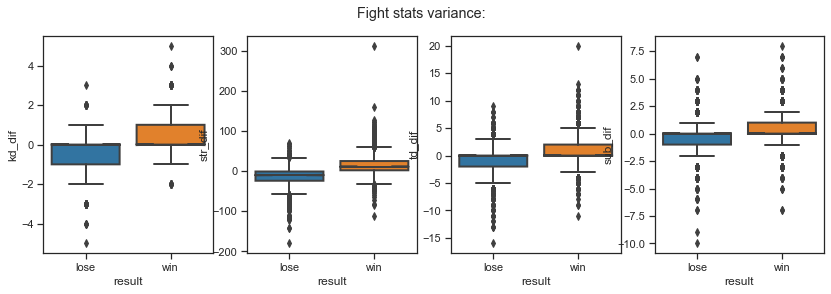

In [37]:
rows=1
cols=4
fig, axs = plt.subplots(rows,cols,figsize = (14,4))
fig.suptitle('Fight stats variance:')

sns.boxplot(ax=axs[0], x='result', y='kd_dif', data=df,notch=True, showcaps=True)
sns.boxplot(ax=axs[1], x='result', y='str_dif', data=df,notch=True, showcaps=True)
sns.boxplot(ax=axs[2], x='result', y='td_dif', data=df,notch=True, showcaps=True)
sns.boxplot(ax=axs[3], x='result', y='sub_dif', data=df,notch=True, showcaps=True)

fight stats contain significant varince > will be included as features

In [38]:
new_features = ['kd_dif','str_dif','td_dif','sub_dif']
for column in new_features:
    df[column] = (df[column] - np.mean(df[column]))/np.std(df[column])

df[new_features].head()    

,kd_dif,str_dif,td_dif,sub_dif
0,-0.000995,-3.071582,-0.019511,-0.013366
1,-0.000995,1.518593,0.375004,-0.013366
2,-0.000995,-0.212129,-0.808541,-1.710673
3,-1.353328,-0.776494,-0.019511,-0.013366
4,-0.000995,0.427486,1.164035,-0.862020


In [39]:
features = []
new_features = ['kd_dif','str_dif','td_dif','sub_dif']

for feature in new_features:
    features.append(feature)
    df[feature] = df[feature]

print('+ Features:')    
print(features)    

+ Features:
['kd_dif', 'str_dif', 'td_dif', 'sub_dif']


# <span style='color:green'> **[done]** </span> Feature Engineering = TakeDowns:
Exploring takedowns as feature using the following columns:
* <span style='color:blue'> **TD Avg.** </span> column
* <span style='color:blue'> **TD Acc.** </span> column
* <span style='color:blue'> **TD Def.** </span> column

In [40]:
tdf = (df[['result','fighter','opponent','f_td avg.','f_td acc.','f_td def.','o_td avg.','o_td acc.','o_td def.']]).copy()
tdf.head(3)

,result,fighter,opponent,f_td avg.,f_td acc.,f_td def.,o_td avg.,o_td acc.,o_td def.
0,lose,Tai Tuivasa,Ciryl Gane,0.00,0.00,0.52,0.62,0.21,0.55
1,win,Robert Whittaker,Marvin Vettori,0.82,0.37,0.84,1.89,0.44,0.74
2,lose,Joaquin Buckley,Nassourdine Imavov,1.35,0.30,0.66,0.95,0.23,0.76


In [41]:
columns = ['td avg.','td acc.','td def.']
for column in columns:
    tdf[column + '_dif'] = tdf['f_' + column] - tdf['o_' + column]
    tdf[column + '_dif'] = (tdf[column + '_dif'] - np.mean(tdf[column + '_dif']))/np.std(tdf[column + '_dif'])
    
tdf = tdf[['result','td avg._dif','td acc._dif','td def._dif']]   
tdf.head()

,result,td avg._dif,td acc._dif,td def._dif
0,lose,-0.354673,-0.753213,-0.137287
1,win,-0.605091,-0.263173,0.298409
2,lose,0.212942,0.226867,-0.371892
3,lose,0.596917,0.191864,-0.170802
4,win,1.659805,2.082018,1.974160


<AxesSubplot:xlabel='result', ylabel='td avg._dif'>

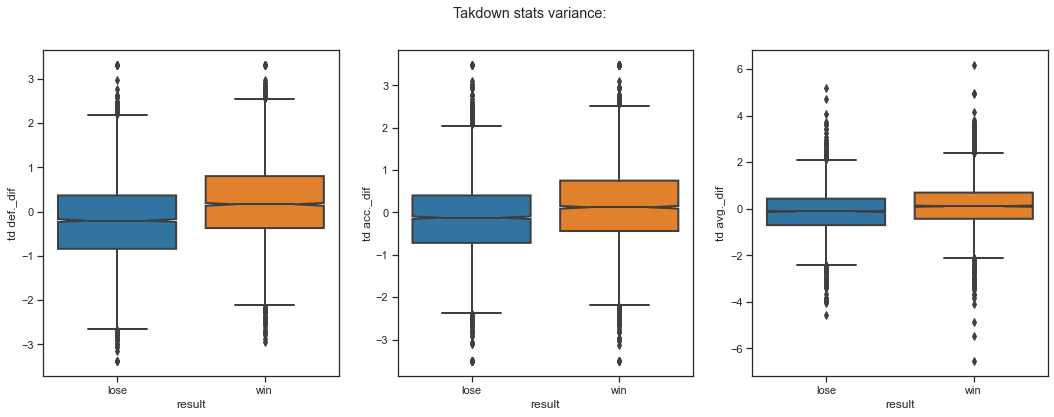

In [42]:
rows=1
cols=3
fig, axs = plt.subplots(rows,cols,figsize = (18,6))
fig.suptitle('Takdown stats variance:')

sns.boxplot(ax=axs[0], x='result', y='td def._dif', data=tdf,notch=True, showcaps=True)
sns.boxplot(ax=axs[1], x='result', y='td acc._dif', data=tdf,notch=True, showcaps=True)
sns.boxplot(ax=axs[2], x='result', y='td avg._dif', data=tdf,notch=True, showcaps=True)

takedowns statistics contain variance > will be included as features

In [43]:
new_features = tdf.columns[1:]

for feature in new_features:
    features.append(feature)
    df[feature] = tdf[feature]

print('Features:')    
print(features)    

Features:
['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td avg._dif', 'td acc._dif', 'td def._dif']


# <span style='color:green'> **[done]** </span> Feature Engineering = Submissions:
Exploring submissions as feature using the following columns:
* <span style='color:blue'> **Sub. Avg.** </span> column = average submission attempts

In [44]:
columns = ['result','fighter', 'opponent','f_sub. avg.','o_sub. avg.']
sub_df = (df[columns]).copy()
sub_df.head(3)

,result,fighter,opponent,f_sub. avg.,o_sub. avg.
0,lose,Tai Tuivasa,Ciryl Gane,0.0,0.5
1,win,Robert Whittaker,Marvin Vettori,0.0,0.6
2,lose,Joaquin Buckley,Nassourdine Imavov,0.0,2.4


In [45]:
column = 'sub. avg.'
sub_df[column + '_dif'] = sub_df['f_' + column] - sub_df['o_' + column]
    
sub_df = sub_df[['result', column+'_dif']]   
sub_df.head()

,result,sub. avg._dif
0,lose,-0.5
1,win,-0.6
2,lose,-2.4
3,lose,0.0
4,win,-1.0


<AxesSubplot:xlabel='result', ylabel='sub. avg._dif'>

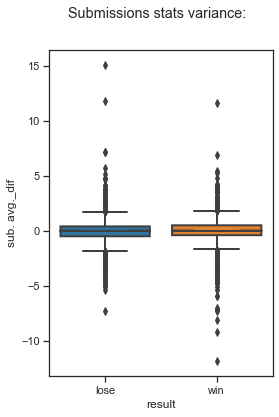

In [46]:
fig, axs = plt.subplots(figsize = (4,6))
fig.suptitle('Submissions stats variance:')
sns.boxplot( x='result', y='sub. avg._dif', data=sub_df, notch=True, showcaps=True)

it seems there is no impact of sub average on the fight outcome, 
i will check what is the case with fights that ended with submission:

In [47]:
mask = df['method'].str.contains('SUB:')
test_sub_df = (df.loc[mask, ['result','fighter','opponent','f_sub. avg.','o_sub. avg.']]).copy()
test_sub_df['sub. avg._dif'] = test_sub_df['f_sub. avg.'] - test_sub_df['o_sub. avg.']
test_sub_df.head()

,result,fighter,opponent,f_sub. avg.,o_sub. avg.,sub. avg._dif
11,win,Stephanie Egger,Ailin Perez,0.8,0.0,0.8
39,win,Frank Mir,Pete Williams,2.0,0.9,1.1
40,win,Matt Serra,Kelly Dullanty,0.9,0.0,0.9
43,lose,Chris Camozzi,Jacare Souza,0.5,1.3,-0.8
47,lose,Mike Rio,Francisco Trinaldo,1.0,0.5,0.5


<AxesSubplot:xlabel='result', ylabel='sub. avg._dif'>

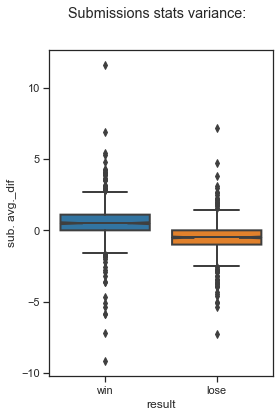

In [48]:
fig, axs = plt.subplots(figsize = (4,6))
fig.suptitle('Submissions stats variance:')
sns.boxplot( x='result', y='sub. avg._dif', data=test_sub_df, notch=True, showcaps=True)

after filtering only the fights that ended with submissions we see significant impact of "sub average", i will use it as a feature due to the fact that submission have big impact of how fighters fight(even though it might not end with sub)

In [49]:
column = 'sub. avg._dif'
sub_df[column] = (sub_df[column] - np.mean(sub_df[column]))/np.std(sub_df[column])
sub_df = sub_df[[column]] 

In [50]:
feature = 'sub. avg._dif'
features.append(feature)
df[feature] = sub_df[feature]
    
print(features)   

['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td avg._dif', 'td acc._dif', 'td def._dif', 'sub. avg._dif']


# <span style='color:green'> **[done]** </span> Feature Engineering = Striking:

* <span style='color:blue'> **SLpM** </span> - Significant Strikes Landed per Minute
* <span style='color:blue'> **Str. Acc.** </span> - Significant Striking Accuracy
* <span style='color:blue'> **SApM** </span> - Significant Strikes Absorbed per Minute
* <span style='color:blue'> **Str. Def.** </span> - Significant Strike Defence (the % of opponents strikes that did not land)

In [51]:
str_df = (df[['result','fighter','opponent','method','f_slpm','o_slpm','f_str. acc.','o_str. acc.','f_sapm','o_sapm','f_str. def','o_str. def','str_dif']]).copy()
str_df.head()

,result,fighter,opponent,method,f_slpm,o_slpm,f_str. acc.,o_str. acc.,f_sapm,o_sapm,f_str. def,o_str. def,str_dif
0,lose,Tai Tuivasa,Ciryl Gane,KO/TKO:Punches,4.12,5.11,0.50,0.59,4.24,2.25,0.45,0.62,-3.071582
1,win,Robert Whittaker,Marvin Vettori,U-DEC:,4.48,4.20,0.42,0.44,3.26,3.58,0.61,0.59,1.518593
2,lose,Joaquin Buckley,Nassourdine Imavov,U-DEC:,3.61,4.08,0.32,0.54,3.42,2.43,0.54,0.62,-0.212129
3,lose,Alessio Di Chirico,Roman Kopylov,KO/TKO:Punches,3.32,3.44,0.39,0.44,3.44,3.81,0.61,0.60,-0.776494
4,win,William Gomis,Jarno Errens,U-DEC:,2.13,1.33,0.45,0.37,1.33,2.13,0.62,0.54,0.427486


In [52]:
columns = ['slpm','str. acc.','sapm','str. def']
for column in columns:
    str_df[column + '_dif'] = str_df['f_' + column] - str_df['o_' + column]
    str_df[column + '_dif'] = (str_df[column + '_dif'] - np.mean(str_df[column + '_dif']))/np.std(str_df[column + '_dif'])
    
str_df = str_df[['result', columns[0] +'_dif',columns[1] +'_dif', columns[2] +'_dif', columns[3] +'_dif']]   
str_df.head()

,result,slpm_dif,str. acc._dif,sapm_dif,str. def_dif
0,lose,-0.657577,-0.756132,1.226495,-1.458041
1,win,0.142363,-0.187964,-0.179470,0.141342
2,lose,-0.330043,-1.811303,0.617852,-0.700439
3,lose,-0.109587,-0.431465,-0.209903,0.057164
4,win,0.469897,0.623706,-0.471619,0.646410


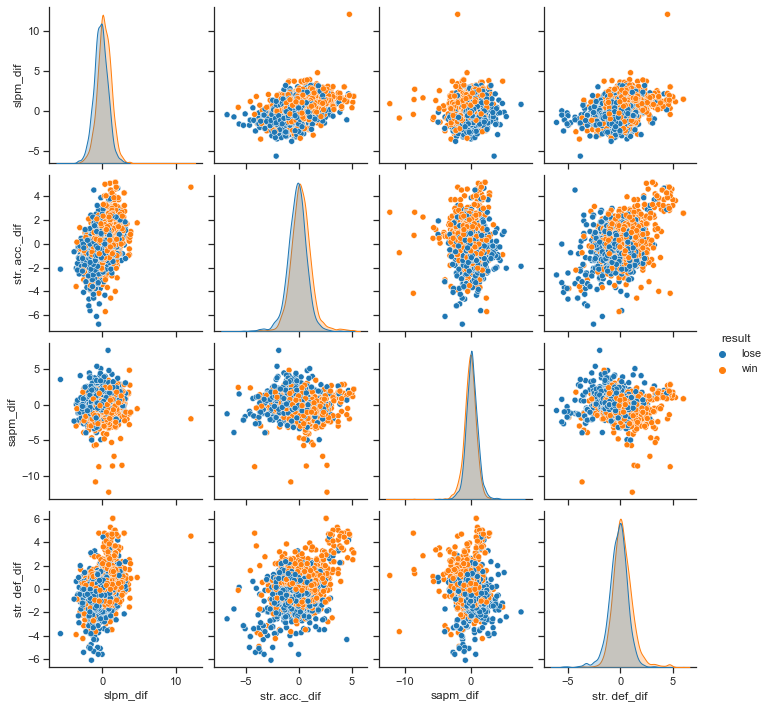

In [53]:
sns.pairplot(data=str_df, hue="result")

striking differences causing variance between fighters win & lose > will be included as features

In [54]:
new_features = str_df.columns[1:]

for feature in new_features:
    features.append(feature)
    df[feature] = str_df[feature]

print('Features:')    
print(features)  

Features:
['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td avg._dif', 'td acc._dif', 'td def._dif', 'sub. avg._dif', 'slpm_dif', 'str. acc._dif', 'sapm_dif', 'str. def_dif']


# <span style='color:green'> **[done]** </span> Feature Engineering = Height:

In [55]:
hdf = (df[['result','fighter','opponent','method','weight class','f_height','o_height']]).copy()
hdf['height_df'] = hdf['f_height'] - hdf['o_height']
hdf['height_df'] = (hdf['height_df'] - np.mean(hdf['height_df']))/np.std(hdf['height_df'])
hdf.head(3)

,result,fighter,opponent,method,weight class,f_height,o_height,height_df
0,lose,Tai Tuivasa,Ciryl Gane,KO/TKO:Punches,Heavyweight,187.96,193.04,-0.760858
1,win,Robert Whittaker,Marvin Vettori,U-DEC:,Middleweight,182.88,182.88,0.014484
2,lose,Joaquin Buckley,Nassourdine Imavov,U-DEC:,Middleweight,177.80,190.50,-1.923871


<AxesSubplot:xlabel='result', ylabel='height_df'>

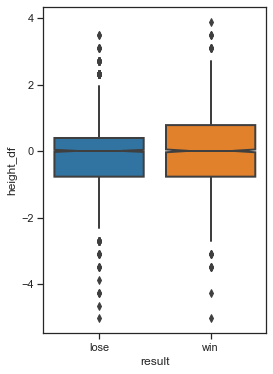

In [56]:
plt.figure(figsize = (4,6))
sns.boxplot(data=hdf, x='result', y='height_df',notch=True, showcaps=False)

height has no significant effect on fight outcome > will be dropped

# <span style='color:green'> **[done]** </span> Feature Engineering = Reach:

In [57]:
rdf = (df[['result','fighter','opponent','method','weight class','f_reach','o_reach']]).copy()
rdf['reach_dif'] = rdf['f_reach'] - rdf['o_reach']
rdf['reach_dif'] = (rdf['reach_dif'] - np.mean(rdf['reach_dif']))/np.std(rdf['reach_dif'])
rdf.head(3)

,result,fighter,opponent,method,weight class,f_reach,o_reach,reach_dif
0,lose,Tai Tuivasa,Ciryl Gane,KO/TKO:Punches,Heavyweight,190.50,205.74,-1.839966
1,win,Robert Whittaker,Marvin Vettori,U-DEC:,Middleweight,185.42,187.96,-0.305062
2,lose,Joaquin Buckley,Nassourdine Imavov,U-DEC:,Middleweight,193.04,190.50,0.308900


<AxesSubplot:xlabel='result', ylabel='reach_dif'>

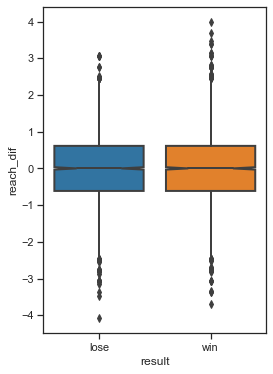

In [58]:
plt.figure(figsize = (4,6))
sns.boxplot(data=rdf, x='result', y='reach_dif',notch=True, showcaps=False)

no significant effect on fight outcome > will be dropped

# <span style='color:green'> **[done]** </span> Feature Engineering = stance:

In [59]:
stance_df = (df[['result','fighter','opponent','f_stance','o_stance']]).copy()
stance_df['stance_combo'] = stance_df['f_stance'] + ':' + stance_df['o_stance']
stance_df.head(3)

,result,fighter,opponent,f_stance,o_stance,stance_combo
0,lose,Tai Tuivasa,Ciryl Gane,Southpaw,Orthodox,Southpaw:Orthodox
1,win,Robert Whittaker,Marvin Vettori,Orthodox,Southpaw,Orthodox:Southpaw
2,lose,Joaquin Buckley,Nassourdine Imavov,Southpaw,Orthodox,Southpaw:Orthodox


In [61]:
stance_df['stance_win_ratio'] = None

for combo,i in zip(stance_df['stance_combo'],range(0,len(df))):
    stance_df.loc[i, 'stance_win_ratio'] = get_wins_ratio(combo=combo,data=stance_df)
    
stance_df.head(3)    

,result,fighter,opponent,f_stance,o_stance,stance_combo,stance_win_ratio
0,lose,Tai Tuivasa,Ciryl Gane,Southpaw,Orthodox,Southpaw:Orthodox,0.547453
1,win,Robert Whittaker,Marvin Vettori,Orthodox,Southpaw,Orthodox:Southpaw,0.470041
2,lose,Joaquin Buckley,Nassourdine Imavov,Southpaw,Orthodox,Southpaw:Orthodox,0.547453


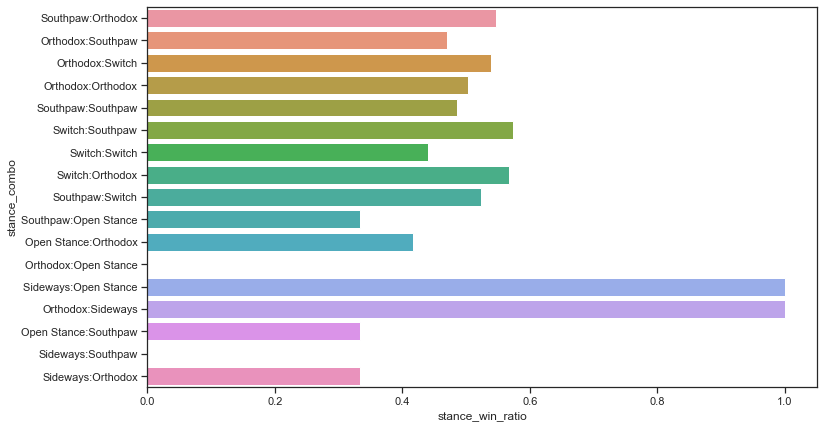

In [62]:
groupedvalues = stance_df.groupby('stance_combo').sum().reset_index()

plt.figure(figsize = (12,7))
ax = sns.barplot(data=stance_df, x="stance_win_ratio", y="stance_combo")

* some stances gives significant edge ( >> 0.5) over its opponent stance,
* 1 or 0 stance_win_ratio is irrelevant (=only one time occured) so i will change it to 0.5 (=50:50 chance)

In [63]:
for i in range(0,len(stance_df)):
    
    if stance_df.loc[i,'stance_win_ratio'] == 1:
        stance_df.loc[i,'stance_win_ratio'] = 0.5
        
    if stance_df.loc[i,'stance_win_ratio'] == 0.0:
        stance_df.loc[i,'stance_win_ratio'] = 0.5 

# normalizing:
stance_df['stance_win_ratio'] = (stance_df['stance_win_ratio'] - np.mean(stance_df['stance_win_ratio']))/np.std(stance_df['stance_win_ratio'])        
stance_df.head(3)        

,result,fighter,opponent,f_stance,o_stance,stance_combo,stance_win_ratio
0,lose,Tai Tuivasa,Ciryl Gane,Southpaw,Orthodox,Southpaw:Orthodox,1.461511
1,win,Robert Whittaker,Marvin Vettori,Orthodox,Southpaw,Orthodox:Southpaw,-1.407755
2,lose,Joaquin Buckley,Nassourdine Imavov,Southpaw,Orthodox,Southpaw:Orthodox,1.461511


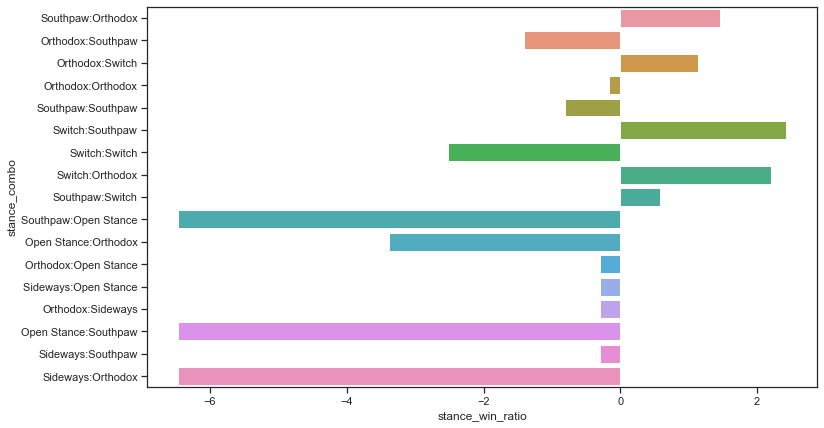

In [64]:
groupedvalues = stance_df.groupby('stance_combo').sum().reset_index()

plt.figure(figsize = (12,7))
ax = sns.barplot(data=stance_df, x="stance_win_ratio", y="stance_combo")

In [65]:
features.append('stance_win_ratio')
df['stance_win_ratio'] = stance_df['stance_win_ratio']
print(features)

['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td avg._dif', 'td acc._dif', 'td def._dif', 'sub. avg._dif', 'slpm_dif', 'str. acc._dif', 'sapm_dif', 'str. def_dif', 'stance_win_ratio']


# <span style='color:green'> **[done]** </span> Feature Engineering = Win/Lose streak:

In [66]:
win_df = (df[['result','fighter','opponent','f_win_perc','o_win_perc','f_win_strk','o_win_strk','f_lose_strk','o_lose_strk']]).copy()
win_df.head(3)

,result,fighter,opponent,f_win_perc,o_win_perc,f_win_strk,o_win_strk,f_lose_strk,o_lose_strk
0,lose,Tai Tuivasa,Ciryl Gane,0.73,0.88,5,0,0,1
1,win,Robert Whittaker,Marvin Vettori,0.78,0.73,0,1,1,0
2,lose,Joaquin Buckley,Nassourdine Imavov,0.71,0.75,3,2,0,0


In [67]:
columns = ['win_perc','win_strk','lose_strk']

for column in columns:
    win_df[column + '_dif'] = win_df['f_' + column] - win_df['o_' + column]
    win_df[column + '_dif'] = (win_df[column + '_dif'] - np.mean(win_df[column + '_dif']))/np.std(win_df[column + '_dif'])
    
win_df = win_df[['result', columns[0] +'_dif',columns[1] +'_dif', columns[2] +'_dif']]   
win_df.head()

,result,win_perc_dif,win_strk_dif,lose_strk_dif
0,lose,-0.400105,2.851303,-1.072901
1,win,0.111674,-0.575708,1.079872
2,lose,-0.118627,0.566629,0.003486
3,lose,1.007286,-0.004540,-1.072901
4,win,-0.016271,-0.004540,0.003486


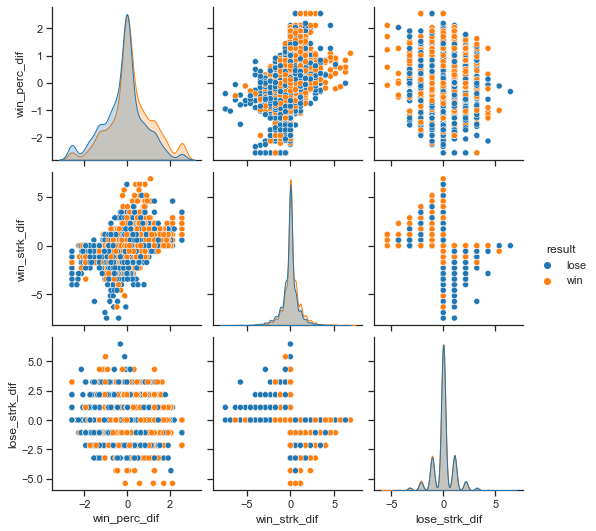

In [68]:
sns.pairplot(data=win_df, hue="result")

we can see very significant variance > might be the strongest predictor for fight's winner > will be included as features

In [69]:
new_features = win_df.columns[1:]
for feature in new_features:
    features.append(feature)
    df[feature] = win_df[feature]
    
print(features)    

['kd_dif', 'str_dif', 'td_dif', 'sub_dif', 'td avg._dif', 'td acc._dif', 'td def._dif', 'sub. avg._dif', 'slpm_dif', 'str. acc._dif', 'sapm_dif', 'str. def_dif', 'stance_win_ratio', 'win_perc_dif', 'win_strk_dif', 'lose_strk_dif']


# <span style='color:green'> **[done]** </span> saving Features data file:

In [71]:
columns = ['result','fighter','opponent','date','weight class','method',]
for feature in features:
    columns.append(feature)

final_df = df[columns]
final_df = final_df.dropna()
final_df.head(3)

,result,fighter,opponent,date,weight class,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
0,lose,Tai Tuivasa,Ciryl Gane,2022-09-03,Heavyweight,KO/TKO:Punches,-0.000995,-3.071582,-0.019511,-0.013366,-0.354673,-0.753213,-0.137287,-0.471767,-0.657577,-0.756132,1.226495,-1.458041,1.461511,-0.400105,2.851303,-1.072901
1,win,Robert Whittaker,Marvin Vettori,2022-09-03,Middleweight,U-DEC:,-0.000995,1.518593,0.375004,-0.013366,-0.605091,-0.263173,0.298409,-0.567154,0.142363,-0.187964,-0.179470,0.141342,-1.407755,0.111674,-0.575708,1.079872
2,lose,Joaquin Buckley,Nassourdine Imavov,2022-09-03,Middleweight,U-DEC:,-0.000995,-0.212129,-0.808541,-1.710673,0.212942,0.226867,-0.371892,-2.284120,-0.330043,-1.811303,0.617852,-0.700439,1.461511,-0.118627,0.566629,0.003486


In [72]:
final_df.to_csv('../data/ufc_data_features.csv')